# Custom oil/water plot

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.patches import PathPatch

## Make fake data

In [81]:
time = pd.date_range('2018-01-01', periods=365, freq='1d')
oil = 1000 * np.random.random(len(time))
water = 100 * np.random.random(len(time))

## Plot a single track

In [92]:
def colour_fill(series, time_series, cmap='viridis', ax=None):
    """Make one colourful curve.
    """
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(2, 10))
        show = True
    else:
        show = False

    y_lims = mpl.dates.date2num(time_series)

    im = ax.imshow(series.reshape(-1, 1), aspect='auto', origin='lower',
                   extent=[series.min(), series.max(), y_lims.min(), y_lims.max()], 
                   cmap=cmap
                  )

    paths = ax.fill_betweenx(time_series, series, series.min(),
                             facecolor='none', lw=0., edgecolor='k',
                            )

    # Make 'fill' mask and clip the background image with it.
    patch = PathPatch(paths._paths[0], visible=False)
    ax.add_artist(patch)
    im.set_clip_path(patch)
    
    if show:
        plt.show()
        return
        
    return ax

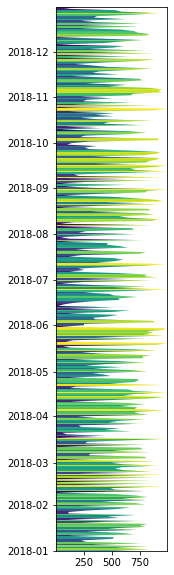

In [93]:
colour_fill(oil, time)

## Plot one well

In [94]:
def make_one_plot(well_name, oil_series, water_series, time_series, axs=None):
   
    # Convert times to num for plotting.
    

    # Set up the figure.
    if axs is None:
        fig, axs = plt.subplots(figsize=(4, 10), ncols=2, nrows=1, sharey=True)
        plt.subplots_adjust(wspace=0)
        show = True
    else:
        show = False

    # Oil plot.
    ax = axs[0]
    ax = colour_fill(oil_series, time_series, ax=ax, cmap='Reds')
    
    # Labels.
    ax.set_title('Oil')
    ax.set_xlim(1000,0)
    ax.set_ylabel('Date')
    ax.set_xlabel('value [units]')

    # Water plot.
    ax = axs[1]
    ax = colour_fill(water_series, time_series, ax=ax, cmap='Blues')

    
    # Labels etc.
    ax.set_title('Water')
    ax.set_xlim(0,100)
    ax.set_xlabel('value [units]')
    ax.invert_yaxis()
    
    if show:
        plt.show()
        return
    
    return axs

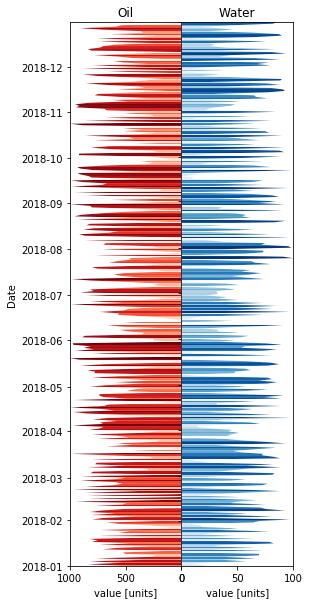

In [95]:
make_one_plot('X', oil, water, time)

### Now let's make two plots.

In [96]:
wells = {
    'well1': {'oil': 1000 * np.random.random(len(time)),
              'water': 100 * np.random.random(len(time)),
             },
    'well2': {'oil': 1000 * np.random.random(len(time)),
              'water': 100 * np.random.random(len(time)),
             },    
}

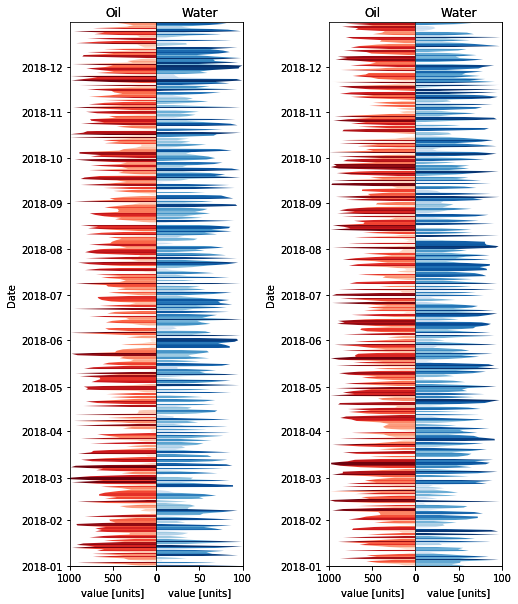

In [98]:
import matplotlib.gridspec as gridspec


y_lims = mpl.dates.date2num(time)
lefts, rights = [0, 0.6], [0.4, 1]

fig = plt.figure(figsize=(3*len(wells), 10))

for left, right, (well, data) in zip(lefts, rights, wells.items()):
    for d in data:

        gs_well = gridspec.GridSpec(1, 2)
        ax0 = fig.add_subplot(gs_well[0,0])
        ax1 = fig.add_subplot(gs_well[0,1])

        # Adjust spacing.
        gs_well.update(wspace=0)
        gs_well.update(left=left)
        gs_well.update(right=right)

        # Oil plot for this well.
        ax = ax0
        ax = colour_fill(data['oil'], time, ax=ax, cmap='Reds')
        ax.set_title('Oil')
        ax.set_xlim(1000,0)
        ax.set_ylabel('Date')
        ax.set_xlabel('value [units]')

        # Water plot.
        ax = ax1
        ax = colour_fill(data['water'], time, ax=ax, cmap='Blues')
        ax.set_title('Water')
        ax.set_xlim(0,100)
        ax.set_xlabel('value [units]')
        ax.invert_yaxis()
        ax.axes.get_yaxis().set_visible(False)
